In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
import tensorflow_datasets as tfds

# Load dataset with info
ds, ds_info = tfds.load('fashion_mnist', split='train', with_info=True)

# Get the class names
class_names = ds_info.features['label'].names

print(class_names)


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

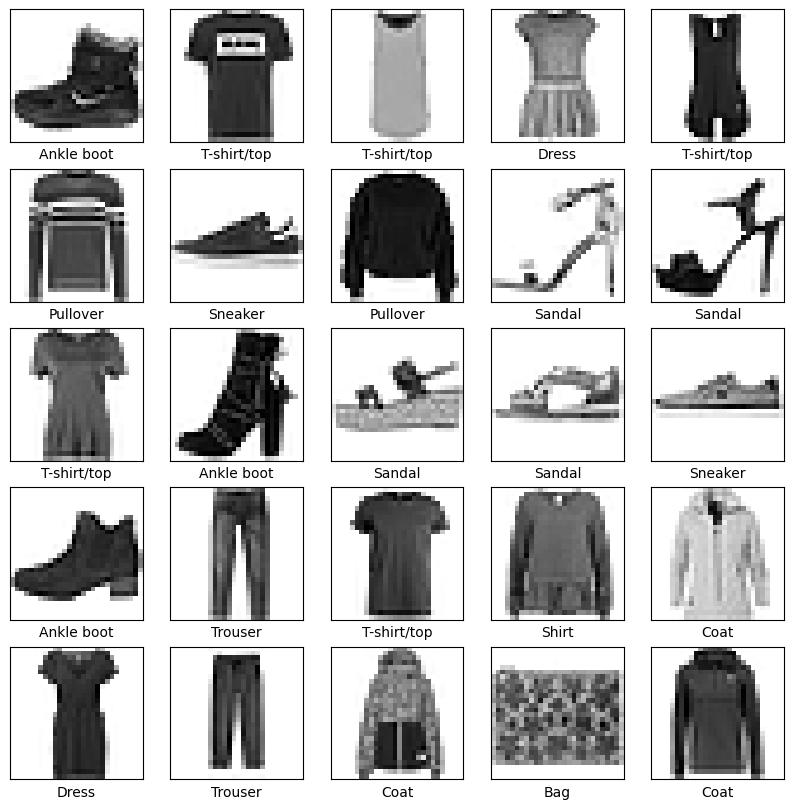

In [11]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                      Dense, BatchNormalization, Dropout, Flatten)

In [13]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1), name='conv1'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='pool1'),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', name='conv4'),
    BatchNormalization(),
    MaxPooling2D((2, 2), name='pool2'),
    Dropout(0.25),

    Flatten(),  # Alternative to GlobalAveragePooling2D for better class separation
    Dense(256, activation='relu', name='dense1'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax', name='output')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 conv2 (Conv2D)              (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 pool1 (MaxPooling2D)        (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train_cat, epochs = 5, validation_data = (X_test, y_test_cat))

Epoch 1/5



1875/1875 [==============================] - 166s 88ms/step - loss: 0.5846 - accuracy: 0.7954 - val_loss: 0.3485 - val_accuracy: 0.8730
Epoch 2/5
1875/1875 [==============================] - 155s 83ms/step - loss: 0.3939 - accuracy: 0.8600 - val_loss: 0.3011 - val_accuracy: 0.8875
Epoch 3/5
1875/1875 [==============================] - 145s 78ms/step - loss: 0.3397 - accuracy: 0.8803 - val_loss: 0.2517 - val_accuracy: 0.9107
Epoch 4/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.3024 - accuracy: 0.8945 - val_loss: 0.2411 - val_accuracy: 0.9148
Epoch 5/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2722 - accuracy: 0.9048 - val_loss: 0.2258 - val_accuracy: 0.9216


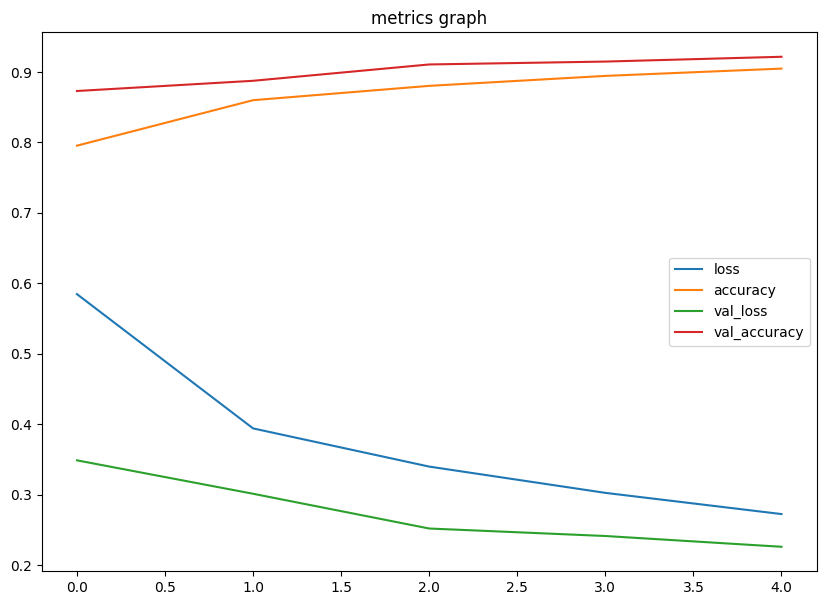

In [17]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.title('metrics graph')
plt.show()

In [18]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 7s 22ms/step - loss: 0.2258 - accuracy: 0.9216


[0.22580407559871674, 0.9215999841690063]

In [19]:
predictions = model.predict(X_test)

313/313 [==============================] - 7s 22ms/step


In [20]:
y_pred = np.argmax(predictions, axis=1)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9216


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.91      0.88      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.88      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.79      0.73      0.76      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [23]:
cm = confusion_matrix(y_test, y_pred)

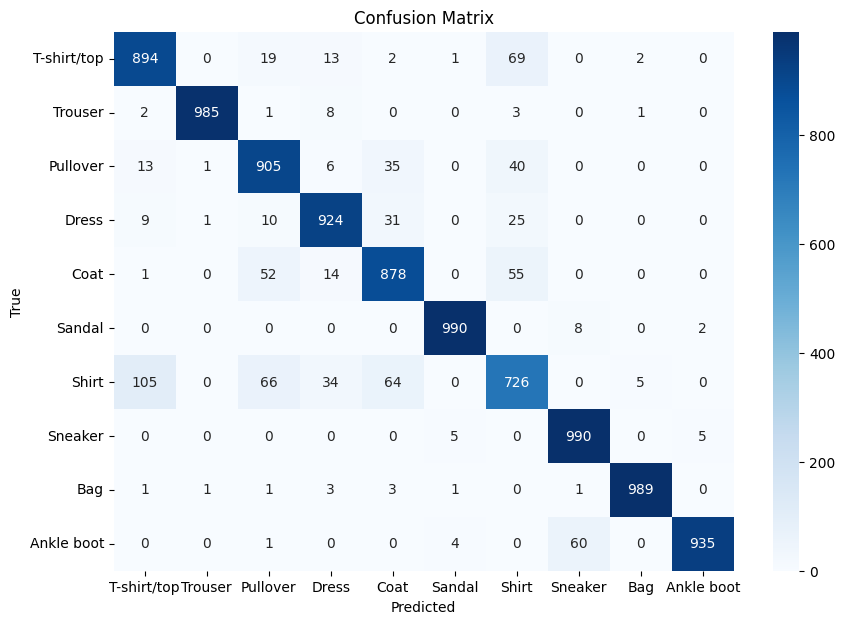

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()